In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
%matplotlib inline

In [3]:
#2-dimensional dataset with 4 unlabeled clusters
np.random.seed(42)
X = np.zeros((400, 2))
X[:100, :] = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
X[100:200, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, 2])
X[200:300, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, -2])
X[300:, :] = np.random.randn(100, 2) * 0.5 + np.array([2, -2])

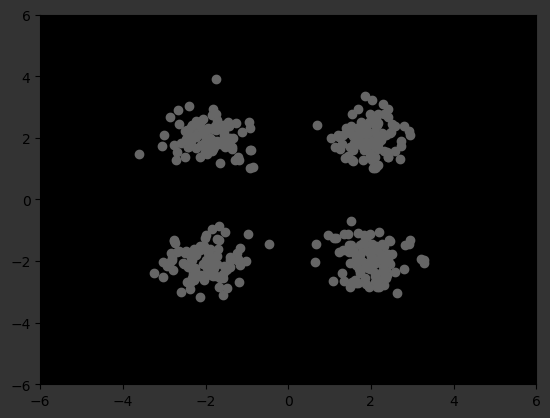

In [4]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [5]:
#3dimensional dataset with 5 unlabeled clusters
np.random.seed(42)

means = [[0, 0, 0],
         [4, 4, 4],
         [8, 8, 8],
         [9, 9, 0],
         [2, 7, 9]]
std = 1
clusters = []

for i in means:
    clusters.append(np.random.normal(i, std, size=(80, 3)))
data = np.array(clusters)
data.resize((400,3))
data

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       ...,
       [ 0.66597451,  6.39863236,  9.31978193],
       [ 0.40700627,  7.44047474,  8.9803622 ],
       [ 2.55248995,  7.22391413, 10.36414043]])

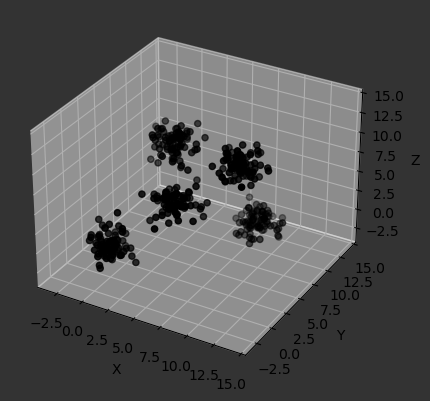

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-4, 15)
ax.set_ylim(-4, 15)
ax.set_zlim(-4, 15)
plt.show()

------

# Lloyd's algorithm

In [7]:
k = 4 # amount of clusters
max_iterations = 100

In [8]:
np.random.seed(42)
initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
centroids = X[initial_indices, :]
centroids #the initial centroids are 4 random observations of the dataset

array([[-1.41035141, -1.96624076],
       [-1.85511257, -0.9622996 ],
       [ 1.96399494,  2.50176645],
       [-0.96962604, -1.12232958]])

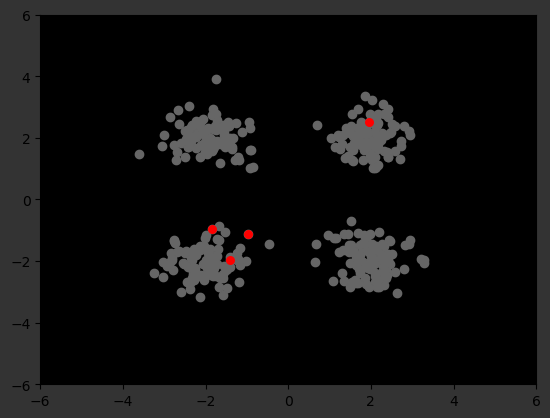

In [9]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(centroids[:,0], centroids[:,1],zorder=2, color='red', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [10]:
for i in range(max_iterations):
    # calculate Euclidean distances from each data point to each centroid
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
    
    # assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)
    
    # calculate new centroids as the mean of each cluster
    new_centroids = np.array([X[labels == j, :].mean(axis=0) for j in range(k)])

    if np.allclose(centroids, new_centroids):
        break
    
    centroids = new_centroids

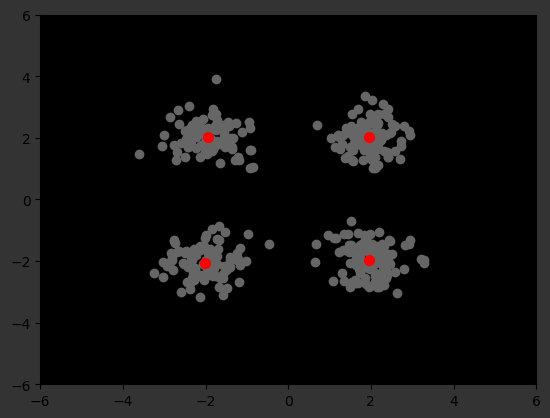

In [11]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [12]:
X_labeled = np.column_stack((X, labels))
np.random.shuffle(X_labeled) # just to make sure...
X_labeled 

array([[-1.99079081, -1.16178134,  0.        ],
       [ 2.04588039,  1.00621554,  2.        ],
       [-2.12448207, -1.51421452,  0.        ],
       ...,
       [ 2.57141141,  2.37596652,  2.        ],
       [ 1.91935714,  2.20202543,  2.        ],
       [-2.81377122, -1.97595753,  0.        ]])

In [13]:
idx_sorted = np.argsort(X_labeled[:, -1])
X_labeled_sorted = X_labeled[idx_sorted, :]
X_labeled_sorted[:, -1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [14]:
labels, counts = np.unique(X_labeled[:, -1], return_counts=True)
label_counts = dict(zip(labels, counts))

for label in label_counts:
    print("Cluster {}: {} data points".format(label+1, label_counts[label]))

Cluster 1.0: 100 data points
Cluster 2.0: 100 data points
Cluster 3.0: 100 data points
Cluster 4.0: 100 data points


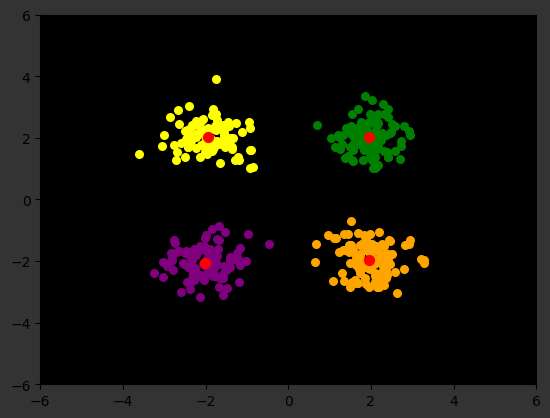

In [15]:
plt.axes().set_facecolor('black')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.scatter(X[:100, 0],X[:100, 1] ,zorder=1, color='green', s=30)
plt.scatter(X[100:200, 0],X[100:200, 1] ,zorder=1, color='yellow', s=30)
plt.scatter(X[200:300, 0],X[200:300, 1] ,zorder=1, color='purple', s=30)
plt.scatter(X[300:, 0],X[300:, 1] ,zorder=1, color='orange', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

-----

In [23]:
def kmeans(data, k):
    # Initialize cluster centers randomly
    centroids = data[np.random.choice(len(data), size=k, replace=False)]
    
    for i in range(90):
        # Assign each point to its nearest cluster center
        labels = np.argmin(((data - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        
        # Update cluster centers as the mean of the assigned points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        #if np.allclose(centroids, new_centroids):
        #    break
            
        centroids = new_centroids
    
    return labels, centroids

In [24]:
labels, centroids = kmeans(data, 5)
data_labeled = np.column_stack((data, labels))
np.random.shuffle(data_labeled) #just to make sure...
data_labeled

array([[ 8.75138712,  6.33059472,  8.54336019,  0.        ],
       [-0.8084936 , -0.50175704,  0.91540212,  2.        ],
       [ 2.63873022,  5.85699509, 10.63343153,  1.        ],
       ...,
       [ 3.51576593,  5.26691115,  3.29233053,  3.        ],
       [ 0.24196227, -1.91328024, -1.72491783,  2.        ],
       [ 2.47704083,  7.07682189,  7.71700778,  1.        ]])

In [25]:
idx_sorted2 = np.argsort(data_labeled[:, -1])
data_sorted = data_labeled[idx_sorted2, :]
data_sorted[:, -1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [26]:
labels, counts = np.unique(data_labeled[:, -1], return_counts=True)

for label in label_counts:
    print("Cluster {}: {} data points".format(label+1, label_counts[label]))

Cluster 1.0: 100 data points
Cluster 2.0: 100 data points
Cluster 3.0: 100 data points
Cluster 4.0: 100 data points


<IPython.core.display.Javascript object>


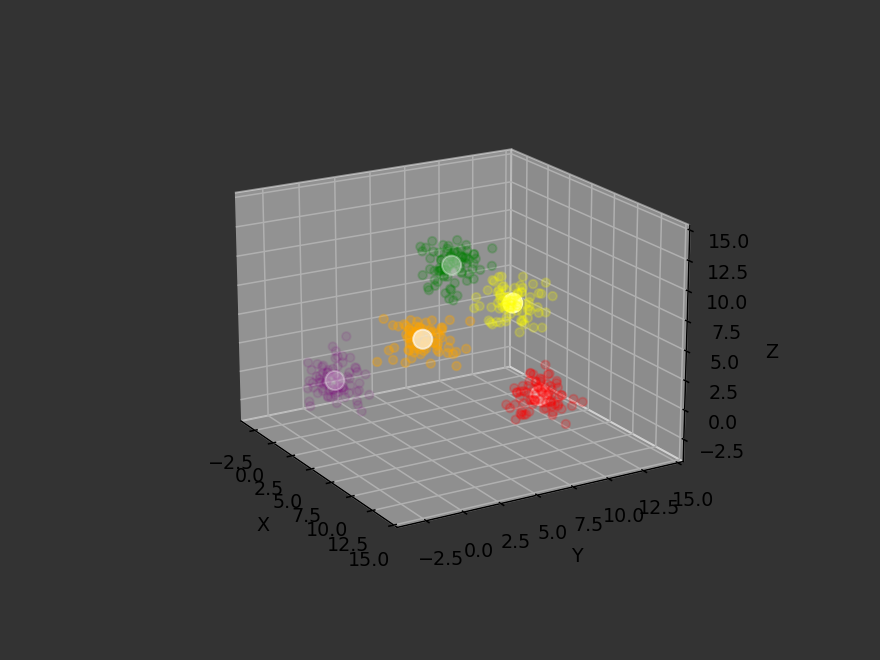

In [37]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')


ax.scatter(data_sorted[320:, 0], data_sorted[320:, 1], data_sorted[320:, 2], c='red', alpha=0.2)
ax.scatter(data_sorted[240:320, 0], data_sorted[240:320, 1], data_sorted[240:320, 2], c='orange', alpha=0.3)
ax.scatter(data_sorted[160:240, 0], data_sorted[160:240, 1], data_sorted[160:240, 2], c='purple', alpha=0.1)
ax.scatter(data_sorted[80:160, 0], data_sorted[80:160, 1], data_sorted[80:160, 2], c='green', alpha=0.2)
ax.scatter(data_sorted[:80, 0], data_sorted[:80, 1], data_sorted[:80, 2], c='yellow', alpha=0.2)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='white',s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-4, 15)
ax.set_ylim(-4, 15)
ax.set_zlim(-4, 15)
plt.show()

In [36]:
%matplotlib notebook

In [38]:
%matplotlib inline